(CellCycling_AnalyzingExperiment)=
# Analyzing complex expriments

The `GES-echem-suite` library provides some custom made experiment class explicitly designed to facilitate the analysis of composite experiments. At this time the following experiment types are supported:

* Rate analysis: Analysis of more than one cell-cycling experiment carried out at a different value of constant-current

## The analysis of charge/dischage rate experiments

The `RateExperiment` class can be used to analyze more than one cell-cycling experiment carried out at a different value of constant-current. A `RateExperiment` object can be created in different ways:

* Directly constructued by the user, by providing a list of current values and a list of the corresponding `CellCycling` objects
* Constructed from a Bilogic Battery module file using the `from_Biologic_battery_module` classmethod.

An example of the latter option is provided in what follows:

In [1]:
from echemsuite.cellcycling.experiments import RateExperiment

# Create a RateExperiment from a Biologic Battery Module file
experiment = RateExperiment().from_Biologic_battery_module("./example_Biologic_BatteryModule/example_BattModule.mpt")
print(experiment)

Rate Experiment
----------------------------------------
0.5A : 1 cycles
1.0A : 5 cycles
1.5A : 5 cycles
2.0A : 5 cycles
2.5A : 5 cycles
3.0A : 5 cycles
3.5A : 5 cycles
4.0A : 5 cycles
4.5A : 5 cycles
5.0A : 5 cycles
----------------------------------------



Now that the `RateExperiment` object representing the experiment has been obtained all the experimental data and derived quantities can be accessed using the built-in class methods and properties. The following script shows how the data can be accessed and graphically represented:

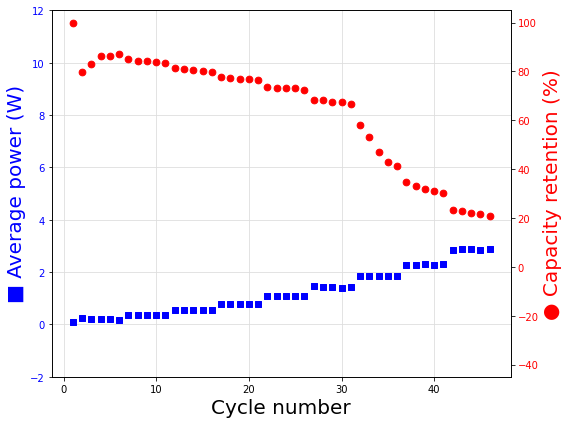

In [2]:
import matplotlib.pyplot as plt
from echemsuite.cellcycling.experiments import RateExperiment

# Create a RateExperiment from a Biologic Battery Module file
experiment = RateExperiment.from_Biologic_battery_module("./example_Biologic_BatteryModule/example_BattModule.mpt")

# Select the values to plot in the graph
N = experiment.numbers
AP = experiment.average_power
CR = experiment.capacity_retention

# Plotting the data 
plt.rcParams.update({'font.size': 18}) 
fig, ax1 = plt.subplots(figsize=(8, 6)) 

color_ax1 = "blue" 
ax1.scatter(N, AP, c=color_ax1, marker="s", s=45, zorder=3) 
ax1.tick_params(axis="y", labelcolor=color_ax1) 
ax1.set_xlabel("Cycle number", size=20) 
ax1.set_ylabel("■ Average power (W)", c=color_ax1, size=20)
ax1.set_ylim((-2, 12))
ax1.grid(which="major", c="#DDDDDD") 
ax1.grid(which="minor", c="#EEEEEE") 

ax2 = ax1.twinx() 
color_ax2 = "red" 
ax2.scatter(N, CR, c=color_ax2, marker="o", s=45, zorder=1) 
ax2.tick_params(axis="y", labelcolor=color_ax2)
ax2.set_ylim((-45, 105))
ax2.set_ylabel("● Capacity retention (%)", c=color_ax2, size=20)  

plt.tight_layout()
plt.show() 